In [24]:
import pandas as pd
import sqlite3

In [25]:
conn = sqlite3.connect("/content/drive/MyDrive/data realted/spotify.sqlite" )

In [26]:
cur= conn.cursor()

In [27]:
query = "SELECT name FROM sqlite_master WHERE type='table'"
cur.execute(query)
cur.fetchall()

[('albums',),
 ('artists',),
 ('audio_features',),
 ('genres',),
 ('r_albums_artists',),
 ('r_albums_tracks',),
 ('r_artist_genre',),
 ('r_track_artist',),
 ('tracks',)]

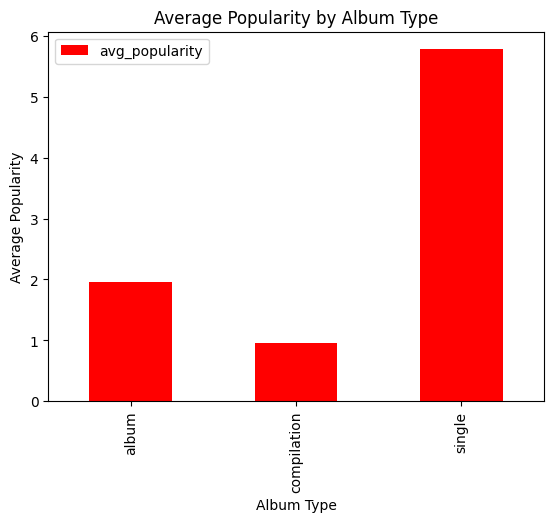

In [28]:
query = """
SELECT
    album_type,
    AVG(popularity) AS avg_popularity
FROM albums
GROUP BY album_type;
"""
df = pd.read_sql(query, conn)

import matplotlib.pyplot as plt
df.plot(kind='bar', x='album_type', y='avg_popularity', title="Average Popularity by Album Type", color='red')
plt.xlabel("Album Type")
plt.ylabel("Average Popularity")
plt.show()


**Singles are more popular **

<ipython-input-29-b519dcd0e81b>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




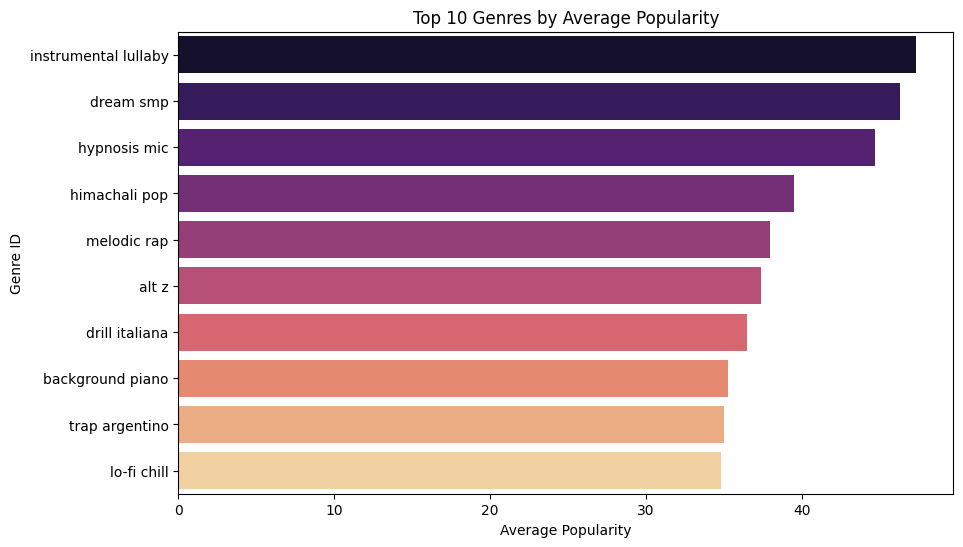

In [29]:
query = """
SELECT
    genres.id AS genre_id,
    AVG(tracks.popularity) AS avg_popularity
FROM genres
JOIN r_artist_genre ON genres.id = r_artist_genre.genre_id
JOIN r_track_artist ON r_artist_genre.artist_id = r_track_artist.artist_id
JOIN tracks ON r_track_artist.track_id = tracks.id
GROUP BY genres.id
ORDER BY avg_popularity DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='avg_popularity', y='genre_id', palette='magma')
plt.title("Top 10 Genres by Average Popularity")
plt.xlabel("Average Popularity")
plt.ylabel("Genre ID")
plt.show()


**"Instrumental lullaby" is the most popular genre by average popularity, suggesting that niche, soothing, or purpose-driven music is highly favored by Spotify users compared to other genres.**

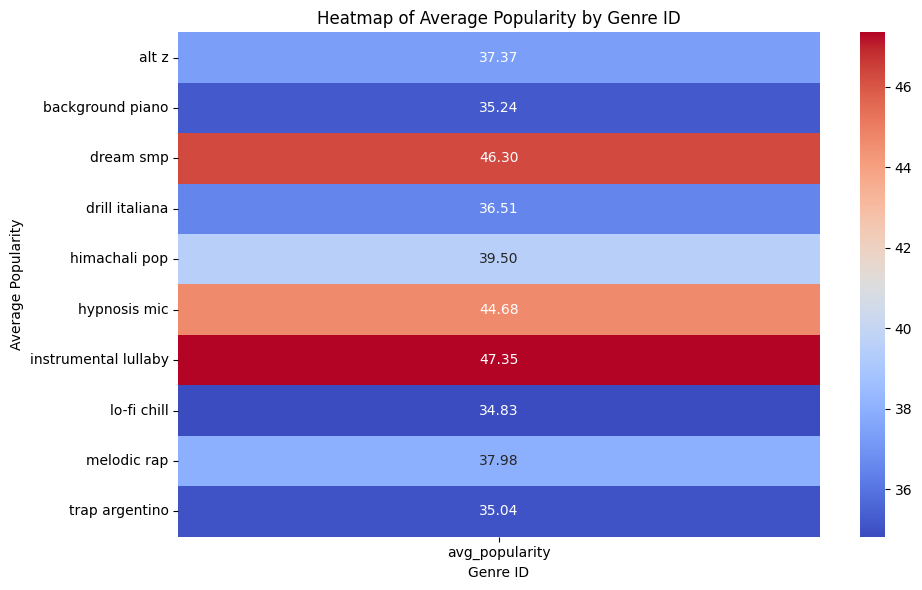

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df.pivot_table(index='genre_id', values='avg_popularity')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Heatmap of Average Popularity by Genre ID")
plt.xlabel("Genre ID")
plt.ylabel("Average Popularity")
plt.tight_layout()
plt.show()


**The heatmap emphasizes that "Instrumental lullaby" and "Dream SMP" have the highest average popularity among genres**

<ipython-input-31-30e1bc353783>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




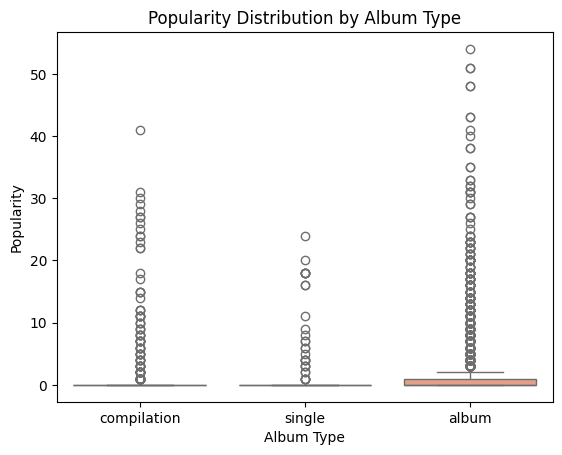

In [31]:
query = """
SELECT
    albums.album_type,
    tracks.popularity
FROM albums
JOIN r_albums_tracks ON albums.id = r_albums_tracks.album_id
JOIN tracks ON r_albums_tracks.track_id = tracks.id
WHERE albums.album_type IS NOT NULL AND tracks.popularity IS NOT NULL
LIMIT 5000;
"""
df = pd.read_sql(query, conn)

sns.boxplot(x='album_type', y='popularity', data=df, palette='coolwarm')
plt.title("Popularity Distribution by Album Type")
plt.xlabel("Album Type")
plt.ylabel("Popularity")
plt.show()


**The boxplot shows that "Albums" have a wider range of popularity, including significantly higher peaks, compared to "Singles" and "Compilations," , here we see  that full albums tend to attract more attention and engagement from Spotify listeners.**

In [32]:
import plotly.express as px

query = """
SELECT
    audio_features.energy AS energy,
    tracks.popularity AS popularity
FROM tracks
JOIN audio_features ON tracks.id = audio_features.id
WHERE tracks.popularity IS NOT NULL AND audio_features.energy IS NOT NULL
LIMIT 500;
"""
df = pd.read_sql(query, conn)

fig = px.scatter(df, x='energy', y='popularity', title="Energy vs. Popularity",
                 labels={'energy': 'Energy', 'popularity': 'Popularity'},
                 color='popularity')
fig.show()


**no clear linear relationship between energy and popularity, but higher-energy tracks (closer to 1.0) tend to have more instances of high popularity, suggesting that energy might contribute to a song's appeal while not being the sole determinant.**

**higher energy levels tend to be more popular,this is helping the client understand listener preferences.**

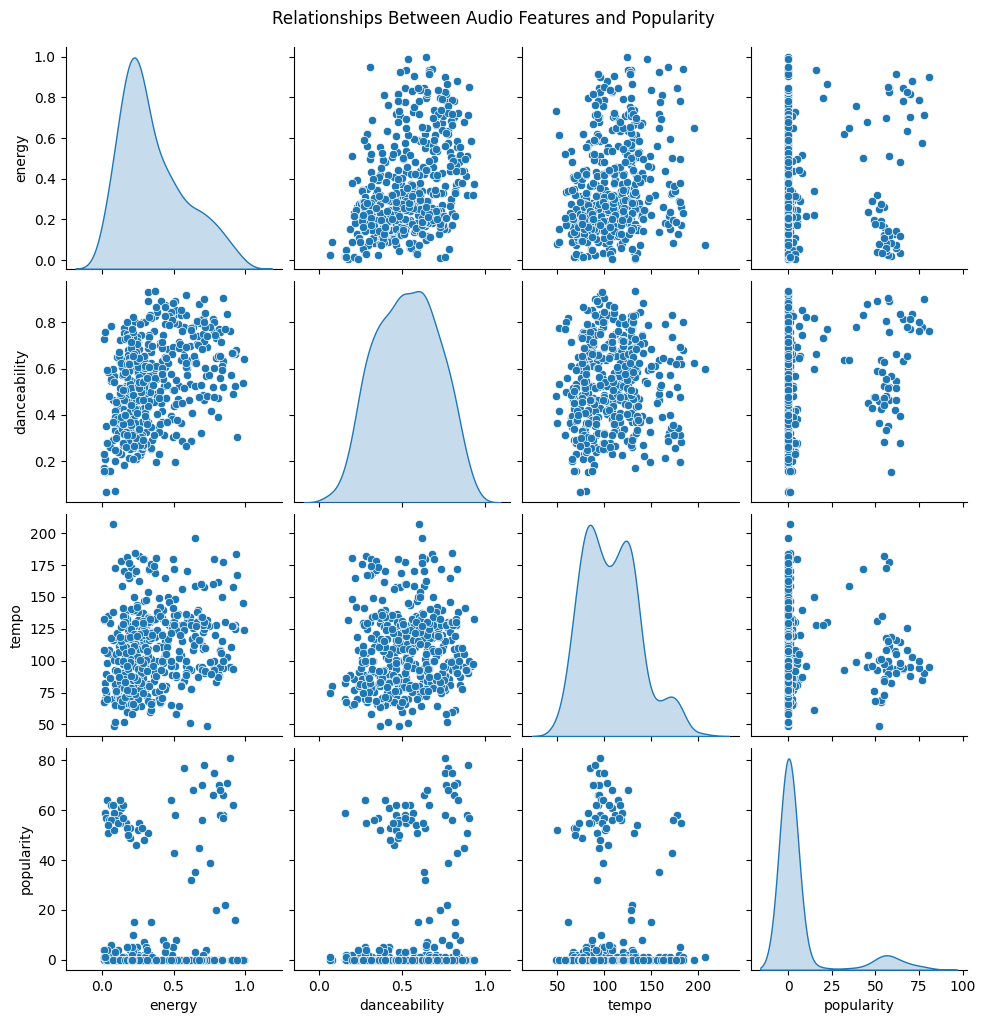

In [33]:
query = """
SELECT
    audio_features.energy,
    audio_features.danceability,
    audio_features.tempo,
    tracks.popularity
FROM tracks
JOIN audio_features ON tracks.id = audio_features.id
WHERE audio_features.energy IS NOT NULL
AND audio_features.danceability IS NOT NULL
AND audio_features.tempo IS NOT NULL
AND tracks.popularity IS NOT NULL
LIMIT 500;
"""
df = pd.read_sql(query, conn)

sns.pairplot(df, vars=['energy', 'danceability', 'tempo', 'popularity'], diag_kind='kde')
plt.suptitle("Relationships Between Audio Features and Popularity", y=1.02)
plt.show()


**The pair plot shows that there are weak or non-linear relationships between audio features (like energy, danceability, and tempo) and popularity, suggesting that no single audio feature strongly determines a track's success, but combinations or other factors may play a significant role.**

In [34]:
query = """
SELECT
    artists.name AS artist_name,
    artists.followers
FROM artists
WHERE artists.followers IS NOT NULL
ORDER BY artists.followers DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)

import plotly.express as px
fig = px.bar(df, x='followers', y='artist_name', orientation='h',
             title="Top 10 Artists by Followers",
             labels={'followers': 'Number of Followers', 'artist_name': 'Artist'})
fig.show()


**Ed Sheeran has the mosr number of followers in Sportify.**

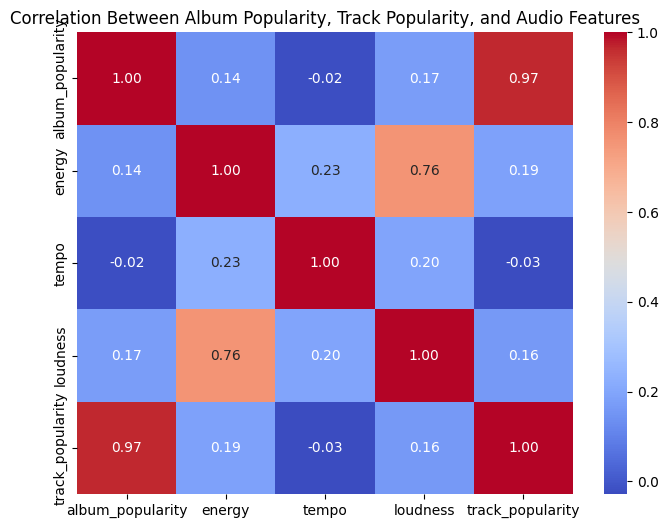

In [35]:
query = """
SELECT
    albums.popularity AS album_popularity,
    audio_features.energy,
    audio_features.tempo,
    audio_features.loudness,
    tracks.popularity AS track_popularity
FROM albums
JOIN r_albums_tracks ON albums.id = r_albums_tracks.album_id
JOIN tracks ON r_albums_tracks.track_id = tracks.id
JOIN audio_features ON tracks.id = audio_features.id
WHERE albums.popularity IS NOT NULL
AND audio_features.energy IS NOT NULL
AND audio_features.tempo IS NOT NULL
AND audio_features.loudness IS NOT NULL
AND tracks.popularity IS NOT NULL
LIMIT 500;
"""
df = pd.read_sql(query, conn)

corr = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Album Popularity, Track Popularity, and Audio Features")
plt.show()


**The correlation matrix indicates a very strong positive relationship between album popularity and track popularity, while audio features like energy, tempo, and loudness show weak to moderate correlations with popularity. This shows  that external factors (e.g., marketing or artist reputation) likely drive popularity more than audio characteristics alone.**

<ipython-input-36-b5a5c21842ff>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




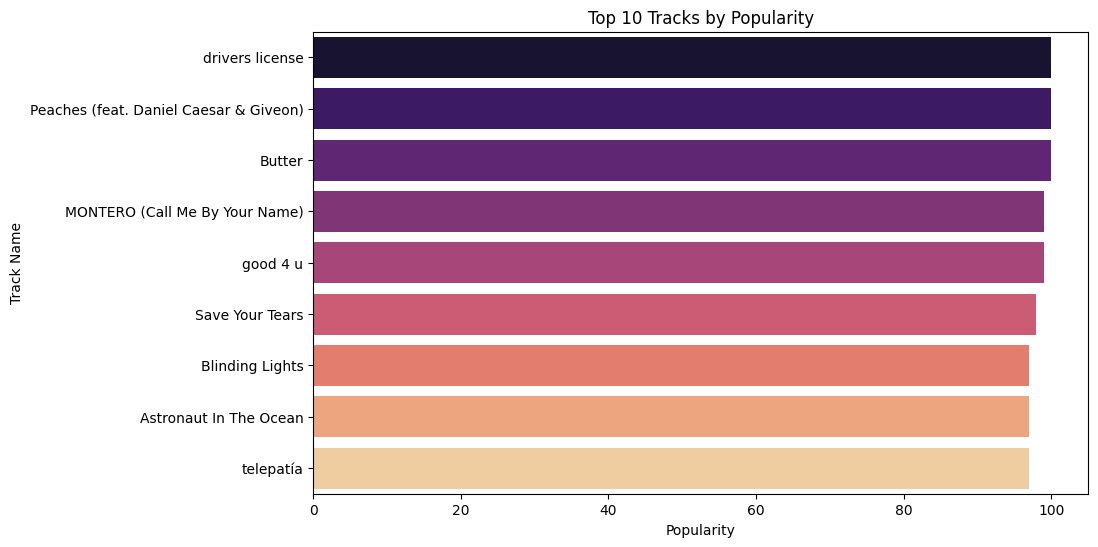

In [36]:
query = """
SELECT
    tracks.name AS track_name,
    tracks.popularity
FROM tracks
WHERE tracks.popularity IS NOT NULL
ORDER BY tracks.popularity DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='popularity', y='track_name', palette='magma')
plt.title("Top 10 Tracks by Popularity")
plt.xlabel("Popularity")
plt.ylabel("Track Name")
plt.show()


**The chart reveals that "drivers license" is the most popular track among the top 10**

In [37]:
query = "SELECT * FROM tracks LIMIT 5;"
df = pd.read_sql(query, conn)
print(df.columns)

Index(['id', 'disc_number', 'duration', 'explicit', 'audio_feature_id', 'name',
       'preview_url', 'track_number', 'popularity', 'is_playable'],
      dtype='object')


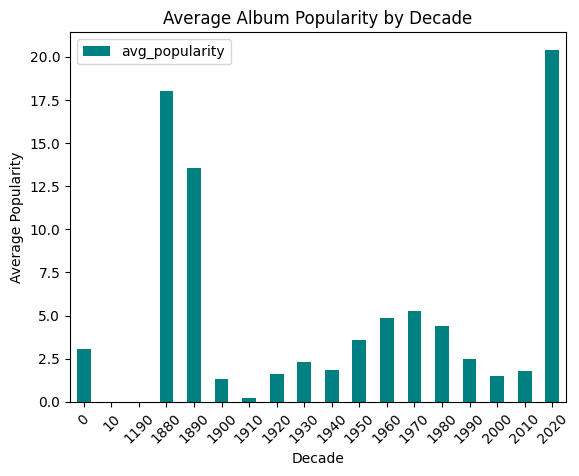

In [38]:
query = """
SELECT
    (strftime('%Y', release_date/1000, 'unixepoch') / 10) * 10 AS decade,
    AVG(popularity) AS avg_popularity
FROM albums
WHERE release_date IS NOT NULL
GROUP BY decade
ORDER BY decade;
"""
df = pd.read_sql(query, conn)

import matplotlib.pyplot as plt

df.plot(kind='bar', x='decade', y='avg_popularity', color='teal', title="Average Album Popularity by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Popularity")
plt.xticks(rotation=45)
plt.show()


**The chart shows that albums from the 2020s are the more popular, meaning people prefer listening to recent music more than older ones.**

In [39]:
query = """
SELECT
    strftime('%Y', release_date/1000, 'unixepoch') AS release_year,
    AVG(tracks.popularity) AS avg_popularity
FROM albums
JOIN r_albums_tracks ON albums.id = r_albums_tracks.album_id
JOIN tracks ON r_albums_tracks.track_id = tracks.id
WHERE release_date IS NOT NULL
GROUP BY release_year
ORDER BY release_year;
"""
df = pd.read_sql(query, conn)


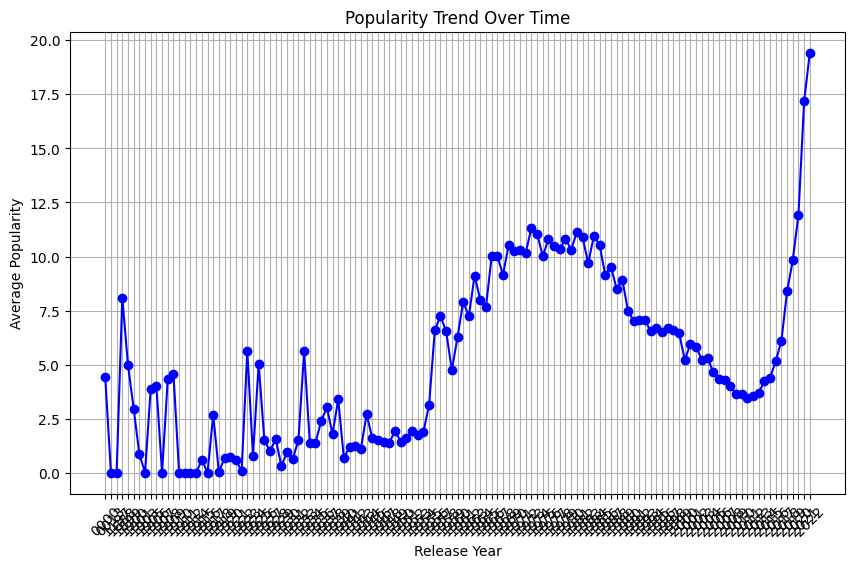

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['release_year'], df['avg_popularity'], marker='o', linestyle='-', color='blue')
plt.title("Popularity Trend Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average Popularity")
plt.grid()
plt.xticks(rotation=45)
plt.show()


**This line shows how the average popularity of tracks has changed over time. It starts low, rises gradually, goes through some ups and downs, and ends with a big increase in recent years. It means music from recent years is generally more appreciated or listened to.**

In [41]:
Query = '''SELECT
    genres.id AS genre_id,
    COUNT(tracks.id) AS track_count
FROM genres
JOIN r_artist_genre ON genres.id = r_artist_genre.genre_id
JOIN r_track_artist ON r_artist_genre.artist_id = r_track_artist.artist_id
JOIN tracks ON r_track_artist.track_id = tracks.id
GROUP BY genres.id
ORDER BY track_count DESC
LIMIT 10;  -- Limit to top 10 genres for simplicity'''

pd.read_sql(query, conn)

,release_year,avg_popularity
0,0000,4.407855
1,0013,0.000000
2,1197,0.000000
3,1888,8.100000
4,1899,4.989899
...,...,...
120,2018,8.384247
121,2019,9.821479
122,2020,11.924003
123,2021,17.170671


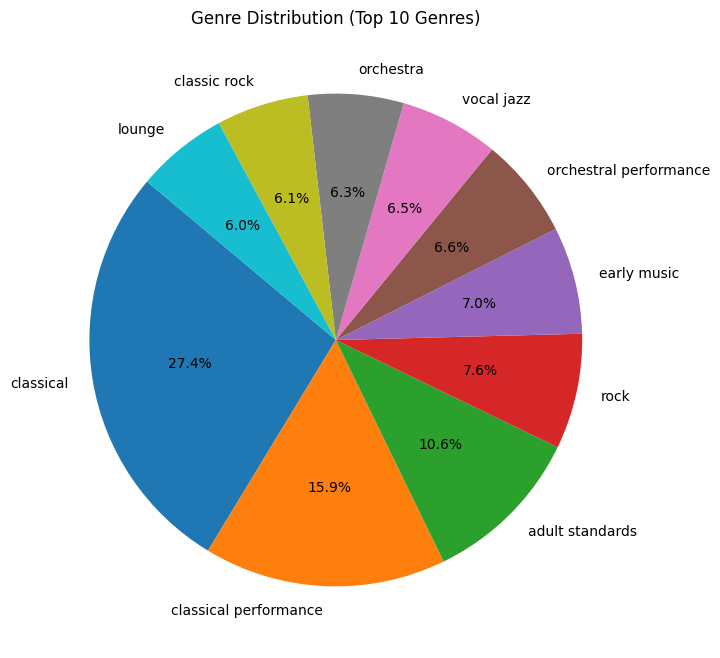

In [42]:
import matplotlib.pyplot as plt

query = """
SELECT
    genres.id AS genre_id,
    COUNT(tracks.id) AS track_count
FROM genres
JOIN r_artist_genre ON genres.id = r_artist_genre.genre_id
JOIN r_track_artist ON r_artist_genre.artist_id = r_track_artist.artist_id
JOIN tracks ON r_track_artist.track_id = tracks.id
GROUP BY genres.id
ORDER BY track_count DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(8, 8))
plt.pie(df['track_count'], labels=df['genre_id'], autopct='%1.1f%%', startangle=140)
plt.title("Genre Distribution (Top 10 Genres)")
plt.show()


<ipython-input-43-1054b09034a1>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




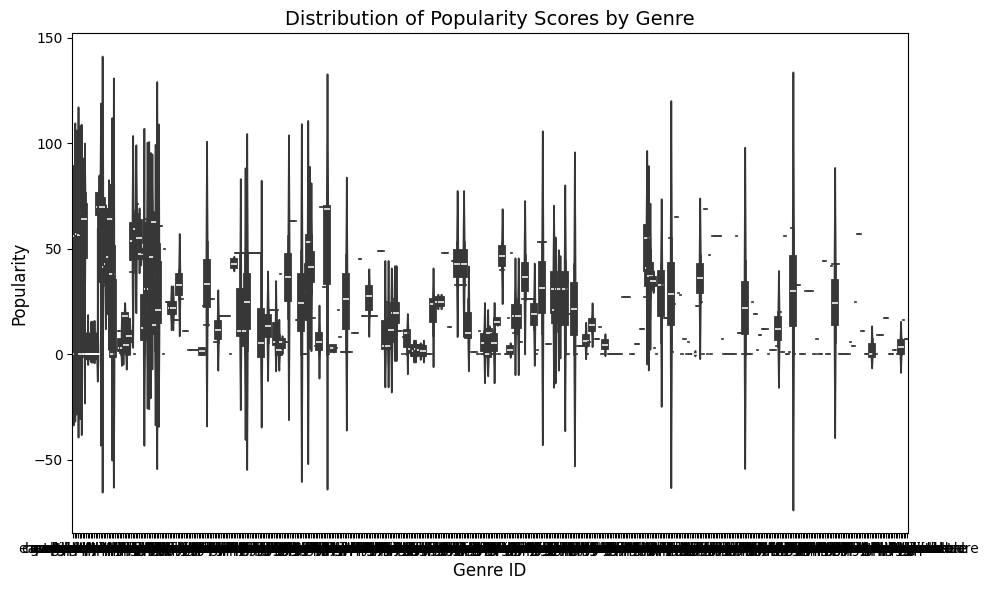

In [43]:
query = """
SELECT
    genres.id AS genre_id,
    tracks.popularity
FROM genres
JOIN r_artist_genre ON genres.id = r_artist_genre.genre_id
JOIN r_track_artist ON r_artist_genre.artist_id = r_track_artist.artist_id
JOIN tracks ON r_track_artist.track_id = tracks.id
WHERE tracks.popularity IS NOT NULL
LIMIT 1000;
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='genre_id', y='popularity', palette='coolwarm')

plt.title("Distribution of Popularity Scores by Genre", fontsize=14)
plt.xlabel("Genre ID", fontsize=12)
plt.ylabel("Popularity", fontsize=12)
plt.tight_layout()
plt.show()



The plot shows that the popularity scores vary widely across genres, with some genres having consistently high popularity and others showing a mix of high and low scores, indicating diverse audience preferences.